To perform image handling and processing, we'll use the `opencv-python` library. The following code will:

1.  **Install OpenCV**: Ensure the necessary library is installed.
2.  **Load an Image**: Read an image file into Python. (You might need to upload an image file to your Colab environment or provide a URL).
3.  **Convert to Grayscale**: Canny edge detection typically works best on grayscale images.
4.  **Apply Canny Edge Detection**: Use the `cv2.Canny()` function to detect edges, which will give us an outline of the objects in the image.
5.  **Display Images**: Show the original image and the Canny-processed image using `matplotlib`.

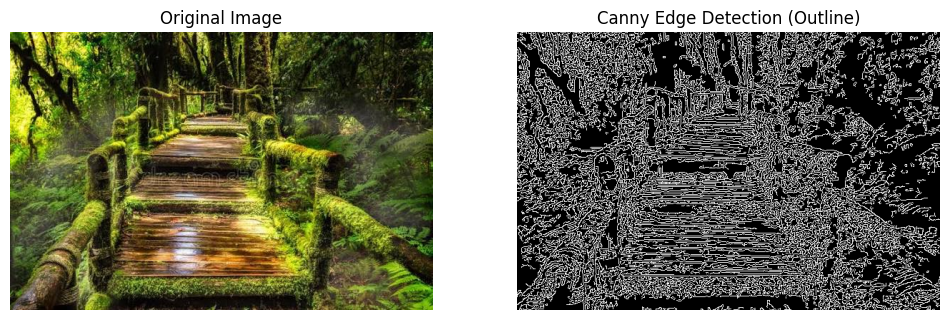

In [2]:
# Install OpenCV if you haven't already
!pip install opencv-python-headless matplotlib

import cv2
import matplotlib.pyplot as plt
import numpy as np

# --- Image Loading ---
# You can upload an image to your Colab environment (e.g., named 'example.jpg')
# or provide a URL to an image.
# For demonstration, let's create a dummy image if no file is uploaded.
image_path = 'image 3.jpg' # Updated to use 'image 3.jpg'

try:
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Image not found at {image_path}. Creating a dummy image for demonstration.")
except FileNotFoundError:
    # Create a simple dummy image for demonstration if file not found
    print(f"Could not find '{image_path}'. Creating a dummy image.")
    dummy_image = np.zeros((300, 400, 3), dtype=np.uint8)
    cv2.circle(dummy_image, (200, 150), 80, (0, 0, 255), -1) # Red circle
    cv2.rectangle(dummy_image, (50, 50), (150, 250), (255, 0, 0), -1) # Blue rectangle
    cv2.putText(dummy_image, "Dummy Image", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
    image = dummy_image

# Check if image was loaded correctly
if image is None:
    print("Error: Could not load any image.")
else:
    # --- Image Preprocessing ---
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # --- Canny Edge Detection ---
    # Apply Canny edge detector to find outlines
    # The threshold values (100, 200) can be adjusted for different results
    canny_edges = cv2.Canny(gray_image, 100, 200)

    # --- Display Results ---
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) # Convert BGR to RGB for matplotlib
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
    plt.imshow(canny_edges, cmap='gray') # Canny output is grayscale
    plt.title('Canny Edge Detection (Outline)')
    plt.axis('off')

    plt.show()